In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [29]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/Fixeddeposit.csv',parse_dates=True)
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


In [30]:
df

Date  High
0  2000-01-01  10.0
1  2001-01-01   8.5
2  2002-01-01   6.3
3  2003-01-01   5.5
4  2004-01-01   6.3
5  2005-01-01   7.0
6  2006-01-01   9.0
7  2007-01-01   9.0
8  2008-01-01   8.5
9  2009-01-01   7.5
10 2010-01-01   8.8
11 2011-01-01   9.3
12 2012-01-01   9.0
13 2013-01-01   9.1
14 2014-01-01   8.8
15 2015-01-01   7.5
16 2016-01-01   6.9
17 2017-01-01   6.7
18 2018-01-01   7.3
19 2019-01-01   6.4
20 2020-01-01   5.4
21 2021-01-01   5.4
22 2022-01-01   5.6
23 2023-01-01   6.6

In [31]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

adf_test(df['High'])

1. ADF :  -3.521770005763729
2. P-Value :  0.007445283081370364
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 15
5. Critical Values :
	 1% :  -3.9644434814814815
	 5% :  -3.0849081481481484
	 10% :  -2.6818144444444445


c:\Users\Kaiyu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Kaiyu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


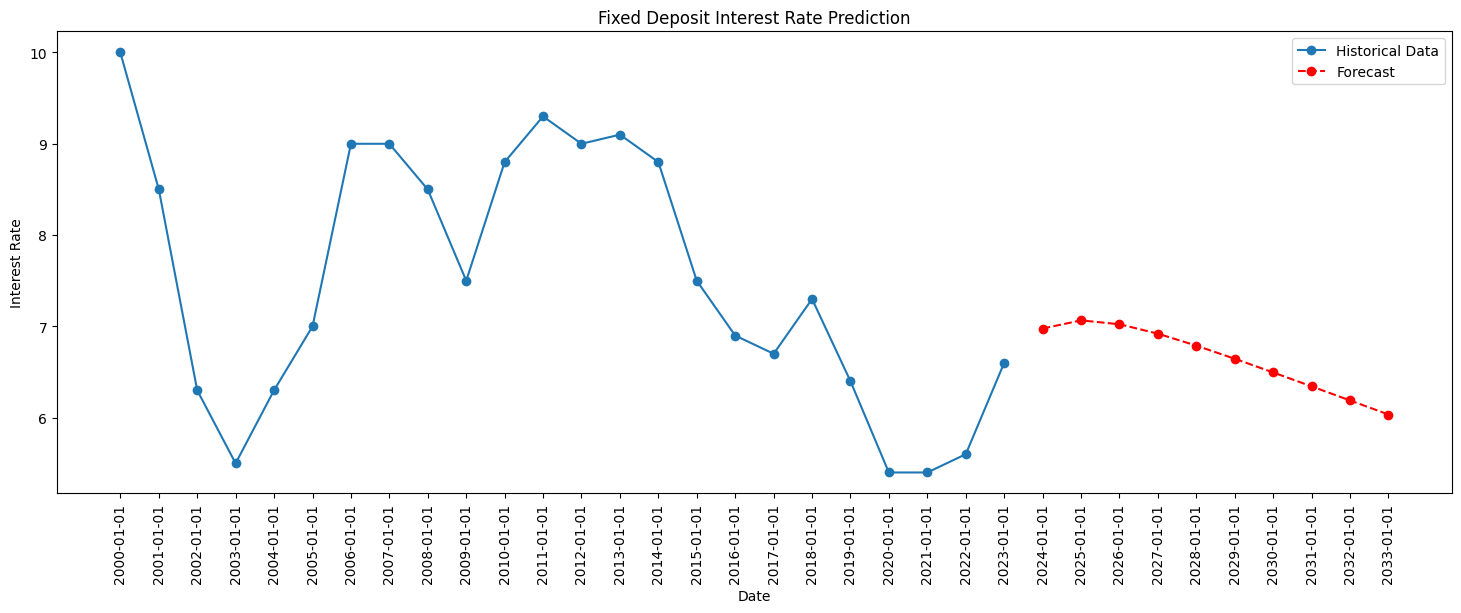

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index = pd.date_range(start='2000-01-01', periods=len(df), freq='YS')
plt.figure(figsize=(18, 6))
plt.plot(df.index, df['High'], marker='o')
plt.title('Fixed Deposit Interest Rates Over Time')
plt.xticks(df.index,rotation=90)
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.show()

model = ARIMA(df['High'], order=(1, 2, 1))
result = model.fit()

future_steps = 10
forecast = result.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='YS')[1:]

plt.figure(figsize=(18, 6))
plt.plot(df.index, df['High'], label='Historical Data', marker='o')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', marker='o', linestyle='dashed', color='red')
plt.title('Fixed Deposit Interest Rate Prediction')
plt.xticks(df.index.union(forecast_index),rotation=90)
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()


In [33]:
forecast.predicted_mean

2024-01-01    6.976358
2025-01-01    7.065852
2026-01-01    7.023395
2027-01-01    6.920244
2028-01-01    6.789174
2029-01-01    6.645262
2030-01-01    6.495442
2031-01-01    6.342906
2032-01-01    6.189120
2033-01-01    6.034759
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [34]:
forecast1=pd.DataFrame(forecast.predicted_mean)
forecast1.reset_index(inplace=True)

In [35]:
forecast1

index  predicted_mean
0 2024-01-01        6.976358
1 2025-01-01        7.065852
2 2026-01-01        7.023395
3 2027-01-01        6.920244
4 2028-01-01        6.789174
5 2029-01-01        6.645262
6 2030-01-01        6.495442
7 2031-01-01        6.342906
8 2032-01-01        6.189120
9 2033-01-01        6.034759

In [37]:
forecast1.to_csv('forecast2.csv', index=False)

In [22]:
# 2024-12-31    6.976358
# 2025-12-31    7.065852
# 2026-12-31    7.023395
# 2027-12-31    6.920244
# 2028-12-31    6.789174
# 2029-12-31    6.645262
# 2030-12-31    6.495442
# 2031-12-31    6.342906
# 2032-12-31    6.189120
# 2033-12-31    6.034759